In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#For data points use X,y
#For line space use x,Y

In [45]:
df = pd.read_csv('lifeexpectancy_usa.csv')

In [46]:
print(df.shape)

(57, 8)


In [47]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,LIFEEXP,MEN,YR,A,1960,66.6,NaN
1,USA,LIFEEXP,MEN,YR,A,1961,67.1,NaN
2,USA,LIFEEXP,MEN,YR,A,1962,66.9,NaN
3,USA,LIFEEXP,MEN,YR,A,1963,66.6,NaN
4,USA,LIFEEXP,MEN,YR,A,1964,66.8,NaN


In [48]:
df.tail()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
52,USA,LIFEEXP,MEN,YR,A,2012,76.4,NaN
53,USA,LIFEEXP,MEN,YR,A,2013,76.4,NaN
54,USA,LIFEEXP,MEN,YR,A,2014,76.5,NaN
55,USA,LIFEEXP,MEN,YR,A,2015,76.3,NaN
56,USA,LIFEEXP,MEN,YR,A,2016,76.1,NaN


In [49]:
df.describe()

,TIME,Value,Flag Codes
count,57.000000,57.000000,0.0
mean,1988.000000,71.475439,NaN
std,16.598193,3.369097,NaN
min,1960.000000,66.600000,NaN
25%,1974.000000,68.200000,NaN
50%,1988.000000,71.400000,NaN
75%,2002.000000,74.400000,NaN
max,2016.000000,76.500000,NaN


In [50]:
X = df['TIME'].values

In [51]:
X

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016], dtype=int64)

In [52]:
y = df['Value'].values

In [53]:
y

array([66.6, 67.1, 66.9, 66.6, 66.8, 66.8, 66.7, 67. , 66.6, 66.8, 67.1,
       67.4, 67.4, 67.6, 68.2, 68.8, 69.1, 69.5, 69.6, 70. , 70. , 70.4,
       70.8, 71. , 71.1, 71.1, 71.2, 71.4, 71.4, 71.7, 71.8, 72. , 72.3,
       72.2, 72.4, 72.5, 73.1, 73.6, 73.8, 73.9, 74.1, 74.3, 74.4, 74.5,
       75. , 75. , 75.2, 75.5, 75.6, 76. , 76.2, 76.3, 76.4, 76.4, 76.5,
       76.3, 76.1])

In [54]:
mean_x = np.mean(X)

In [55]:
mean_x

1988.0

In [56]:
mean_y = np.mean(y)

In [57]:
mean_y

71.47543859649123

In [58]:
m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i]- mean_x) * (y[i] - mean_y)
    denom += (X[i]- mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)
    
#print coefficients

print(b1,b0)

0.20135467980295568 -328.8176648517846


In [59]:
max_x = np.max(X) + 10

min_x = np.min(X) - 10


In [60]:
max_x

2026

In [61]:
min_x

1950

In [62]:
#Calculating line values of x and y

x = np.linspace(min_x, max_x, 10)

Y = b0 + b1 * x




In [63]:
x

array([1950.        , 1958.44444444, 1966.88888889, 1975.33333333,
       1983.77777778, 1992.22222222, 2000.66666667, 2009.11111111,
       2017.55555556, 2026.        ])

In [64]:
Y

array([63.82396076, 65.52428917, 67.22461758, 68.92494599, 70.62527439,
       72.3256028 , 74.02593121, 75.72625961, 77.42658802, 79.12691643])

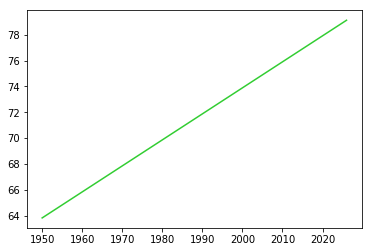

In [65]:
#Plotting the line

plt.plot(x, Y, color='#32CD32', label='Regression Line')

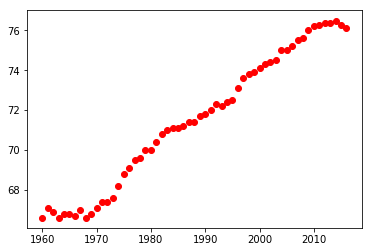

In [74]:
#Plotting scatter points

plt.scatter(X, y, c='#FF0000', label='Scatter Plot')

No handles with labels found to put in legend.


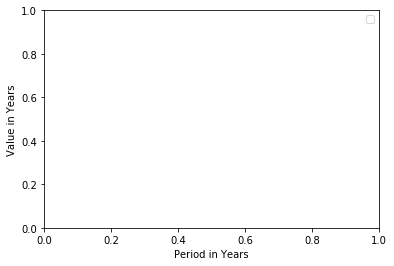

In [75]:
#Representing the  model graphically

plt.xlabel('Period in Years')
plt.ylabel('Value in Years')
plt.legend()
plt.show()

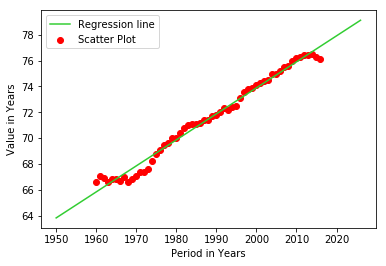

In [77]:
#Plotting values and Regression line

max_x = np.max(X) + 10
min_x = np.min(X) -10

#Calculating line values x and y

x = np.linspace(min_x, max_x, 10)
Y = b0 + b1 * x

#Plotting line

plt.plot(x, Y, color='#32CD32', label='Regression line')

#Plotting scatter points

plt.scatter(X, y, c='#FF0000', label='Scatter Plot')

plt.xlabel('Period in Years')
plt.ylabel('Value in Years')
plt.legend()
plt.show()

In [69]:
#Assessing how good our model is using Root Mean Squared Error and Coefficient of Determination(R^2R2 Score)


#first using RMSE;


rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/m)
print(rmse)

0.4217195631589552


In [71]:
#Using Coefficient of Determination

ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
    
r2 = 1 - (ss_r/ss_t)
print(r2)

0.9840519607099086


In [84]:
#Now simplified using the scikit-learn approach

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))

#creating model
reg = LinearRegression()

#Fitting training data
reg = reg.fit(X,y)

#Y- prediction
Y_pred = reg.predict(X)

#Calculating RMSE and R2 Score
mse = mean_squared_error(y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,y)

print('An ideal mse value heads towards 0.0 (convergence)')
print('Ours is:')
print(np.sqrt(mse))
print('')
print('An ideal r2 score is 1')
print('Ours is:')
print(r2_score)
print('')
print('NB: Getting a mse of exactly 0 implies overfitting and a very high mse(heading towards 1) implies underfitting')




An ideal mse value heads towards 0.0 (convergence)
Ours is:
0.42171956315895537

An ideal r2 score is 1
Ours is:
0.9840519607099086

NB: Getting a mse of exactly 0 implies overfitting and a very high mse(heading towards 1) implies underfitting
